<a href="https://colab.research.google.com/github/Mohamed-Adel-l/Deep-Learning/blob/main/Augmentation_(Pretrained_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfd
import pandas as pd
from tabulate import tabulate
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input

In [ ]:
st_dataset=tfd.load('stanford_dogs',as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.5W5DFI_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.5W5DFI_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [ ]:
X_train = tfd.load('stanford_dogs', split='train[:80%]', as_supervised=True)
X_vald = tfd.load('stanford_dogs', split='train[80%:]', as_supervised=True)
X_test = tfd.load('stanford_dogs', split='test', as_supervised=True)
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image)
    return image, label

X_train = X_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
X_vald = X_vald.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
X_test = X_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
base_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))
base_model.trainable=False

In [ ]:
model = tf.keras.Sequential([    #without augmentation
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, epochs=15, validation_data=X_vald)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.4670 - loss: 2.3674 - val_accuracy: 0.7221 - val_loss: 0.9497
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.8154 - loss: 0.6035 - val_accuracy: 0.7117 - val_loss: 0.9706
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.8764 - loss: 0.3657 - val_accuracy: 0.7304 - val_loss: 0.9574
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9232 - loss: 0.2398 - val_accuracy: 0.7396 - val_loss: 0.9248
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.9499 - loss: 0.1547 - val_accuracy: 0.7325 - val_loss: 1.0969
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 119ms/step - accuracy: 0.9592 - loss: 0.1202 - val_accuracy: 0.7425 - val_loss: 1.0852
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.9697 - loss: 0.0939 - val_accuracy: 0.7433 - val_loss: 1.0833
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step - accuracy: 0.9740 - loss: 0

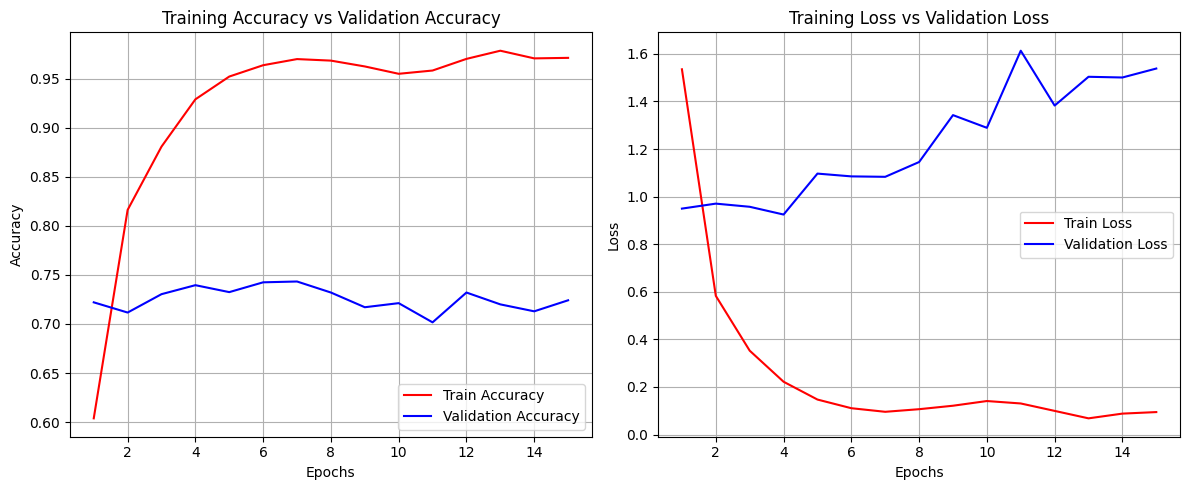

In [ ]:
train_loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
train_acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']
epochs=range(1,len(train_loss)+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', color='red')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='blue')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', color='red')
plt.plot(epochs, val_loss, label='Validation Loss', color='blue')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(X_test)

269/269 ━━━━━━━━━━━━━━━━━━━━ 28s 102ms/step - accuracy: 0.7454 - loss: 1.4566


[1.4754645824432373, 0.7409090995788574]

In [ ]:
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.02),
    tf.keras.layers.RandomZoom(0.02),
    tf.keras.layers.RandomContrast(0.05),
])

In [ ]:
model_augmentation= tf.keras.Sequential([      #with augmentation
    data_augment,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

In [ ]:
model_augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_aug=model_augmentation.fit(X_train, epochs=15, validation_data=X_val)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 178ms/step - accuracy: 0.1910 - loss: 3.7332 - val_accuracy: 0.5546 - val_loss: 1.4940
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 53s 167ms/step - accuracy: 0.4691 - loss: 2.0018 - val_accuracy: 0.6104 - val_loss: 1.2394
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 171ms/step - accuracy: 0.5538 - loss: 1.6021 - val_accuracy: 0.6183 - val_loss: 1.2769
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.6276 - loss: 1.3030 - val_accuracy: 0.6029 - val_loss: 1.3677
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.6949 - loss: 1.0668 - val_accuracy: 0.5996 - val_loss: 1.4272
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.7378 - loss: 0.8832 - val_accuracy: 0.6154 - val_loss: 1.4127
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.7921 - loss: 0.6952 - val_accuracy: 0.5904 - val_loss: 1.5567
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.8246 - loss: 0

In [ ]:
model_augmentation.evaluate(X_test)

269/269 ━━━━━━━━━━━━━━━━━━━━ 34s 126ms/step - accuracy: 0.6186 - loss: 1.9602


[1.9463311433792114, 0.6164335608482361]

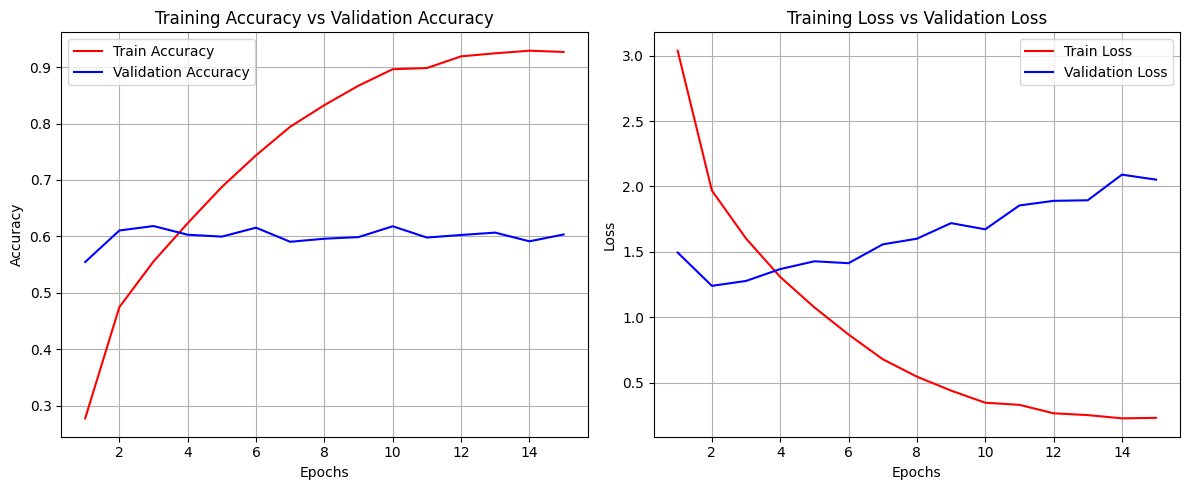

In [ ]:
train_loss_aug=hist_aug.history['loss']
val_loss_aug=hist_aug.history['val_loss']
train_acc_aug=hist_aug.history['accuracy']
val_acc_aug=hist_aug.history['val_accuracy']
epochs=range(1,len(train_loss_aug)+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_aug, label='Train Accuracy', color='red')
plt.plot(epochs, val_acc_aug, label='Validation Accuracy', color='blue')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_aug, label='Train Loss', color='red')
plt.plot(epochs, val_loss_aug, label='Validation Loss', color='blue')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

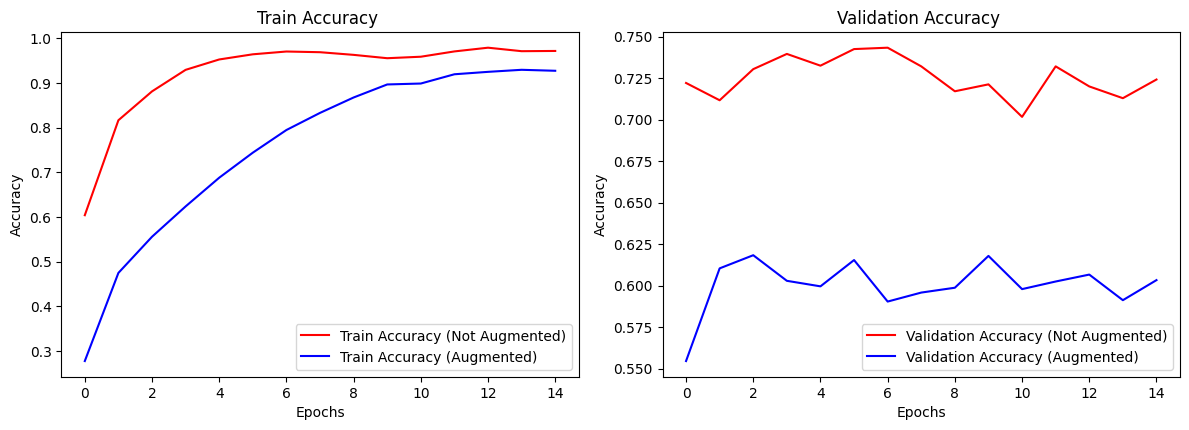

In [ ]:
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label='Train Accuracy (Not Augmented)', color='red')
    plt.plot(hist_aug.history['accuracy'], label='Train Accuracy (Augmented)', color='blue')
    plt.title('Train Accuracy ')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Not Augmented)', color='red')
    plt.plot(hist_aug.history['val_accuracy'], label='Validation Accuracy (Augmented)', color='blue')
    plt.title('Validation Accuracy ')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
results = [
    ['Pretrained_no_aug',
     round(history.history['loss'][-1], 4),
     round(history.history['accuracy'][-1], 4),
     round(history.history['val_loss'][-1], 4),
     round(history.history['val_accuracy'][-1], 4)],

    ['Pretrained_aug',
     round(hist_aug.history['loss'][-1], 4),
     round(hist_aug.history['accuracy'][-1], 4),
     round(hist_aug.history['val_loss'][-1], 4),
     round(hist_aug.history['val_accuracy'][-1], 4)]
]

headers = ['Model', 'Train Loss', 'Train Accuracy', 'Validation Loss', 'Validation Accuracy']
print(tabulate(results_data, headers=headers, tablefmt='fancy_grid'))

╒═══════════════════╤══════════════╤══════════════════╤═══════════════════╤═══════════════════════╕
│ Model             │   Train Loss │   Train Accuracy │   Validation Loss │   Validation Accuracy │
╞═══════════════════╪══════════════╪══════════════════╪═══════════════════╪═══════════════════════╡
│ Pretrained_no_aug │       0.0945 │           0.9715 │            1.5385 │                0.7242 │
├───────────────────┼──────────────┼──────────────────┼───────────────────┼───────────────────────┤
│ Pretrained_aug    │       0.2297 │           0.9271 │            2.0519 │                0.6033 │
╘═══════════════════╧══════════════╧══════════════════╧═══════════════════╧═══════════════════════╛
